In [106]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import gurobipy as gp
from gurobipy import GRB, quicksum
import itertools
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [388]:
n = 10
t = 5
c = 2
players = ["p" + str(i) for i in range(n)]
Times = ["t"+str(i) for i in range(t)]
tau = np.random.randint(1,21,10)
tau = {kk:(vv+1) for kk,vv in zip(players, range(n))}

effs = np.linspace(n*t/4,n*t).tolist()
effs = [round(ii,2) for ii in effs]
xVals = {(kk,tt):[] for kk in players for tt in Times}
xTotVals = {kk:[] for kk in players}
unf = []
print(effs)

[12.5, 13.27, 14.03, 14.8, 15.56, 16.33, 17.09, 17.86, 18.62, 19.39, 20.15, 20.92, 21.68, 22.45, 23.21, 23.98, 24.74, 25.51, 26.28, 27.04, 27.81, 28.57, 29.34, 30.1, 30.87, 31.63, 32.4, 33.16, 33.93, 34.69, 35.46, 36.22, 36.99, 37.76, 38.52, 39.29, 40.05, 40.82, 41.58, 42.35, 43.11, 43.88, 44.64, 45.41, 46.17, 46.94, 47.7, 48.47, 49.23, 50.0]


In [389]:
for ee in effs:
    M = gp.Model()
    M.params.LogToConsole = 0
    x = M.addVars(players, Times, lb = 0, ub = 1,  name = "x")
    b = M.addVars(players, vtype=GRB.BINARY, name = "b")
    card_b = M.addVars(players, Times, vtype=GRB.BINARY, name = "cB")
    p = M.addVar(obj=1, name = "maxi")
    q = M.addVar(obj = -1, name = "mini")

    M.addConstrs(x.sum('*',tt) == 1 for tt in Times)
    M.addConstrs(x[pp,tt] <= card_b[pp,tt] for pp in players for tt in Times)
    M.addConstrs(card_b.sum("*",tt) <= c for tt in Times)
    M.addConstrs(p >= (x.sum(pp,"*"))*tau[pp] for pp in players)
    M.addConstrs(q + t*tau[pp]*b[pp] >= (x.sum(pp,"*"))*tau[pp] for pp in players)
    M.addConstrs(q <= (x.sum(pp,"*"))*tau[pp] for pp in players)
    M.addConstr(b.sum('*') <= 1)

    M.addConstr(quicksum(tau[pp]*(x.sum(pp,"*")) for pp in players) >= ee)
    #     M.params.PoolSearchMode = 2
    M.update()

    M.optimize()
    unf.append(M.ObjVal)
    for pp in players:
        for tt in Times:
            xVals[pp,tt].append( x[pp,tt].X)
        xTotVals[pp].append( sum(x[pp,tt].X for tt in Times) )
# Total Welfare
print("Total Welfare:", sum([tau[pp]*x[pp,tt].X for pp,tt in itertools.product(players,Times)]))

Total Welfare: 50.0


Text(0, 0.5, 'Unfairness value')

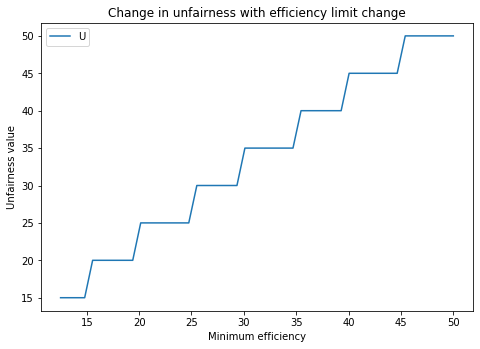

In [390]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(effs, unf)
ax.legend(labels=("Unfairness"))
ax.set_title("Change in unfairness with efficiency limit change")
ax.set_xlabel("Minimum efficiency")
ax.set_ylabel("Unfairness value")

Text(0, 0.5, 'Solution value')

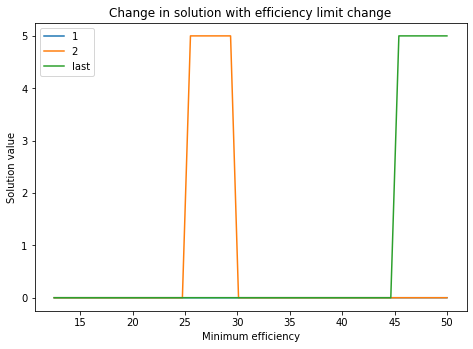

In [394]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(effs, xTotVals['p0'])
l2 = ax.plot(effs, xTotVals['p5'])
l3 = ax.plot(effs, xTotVals[players[-1]])
ax.legend(labels=("1","2","last"))
ax.set_title("Change in solution with efficiency limit change")
ax.set_xlabel("Minimum efficiency")
ax.set_ylabel("Solution value")

In [393]:
xTotVals

{'p0': [5.46531344535841e-07,
  0.0,
  0.0,
  3.9585190577095506e-07,
  4.999999997368221e-07,
  0.0,
  5.509540845327621e-06,
  0.0,
  0.0,
  7.098747753508938e-07,
  0.0,
  9.999999937827546e-07,
  8.185205845334664e-07,
  0.0,
  0.0,
  0.0,
  0.0,
  1.6269718799475709e-06,
  1.8611127049664815e-06,
  4.1356219471211375e-07,
  0.0,
  0.0,
  0.0,
  4.967738483911539e-07,
  0.0,
  0.0,
  0.0,
  3.18230842760725e-07,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.4954069067762976e-07,
  1.2279159133567577e-07,
  1.440208801256862e-07,
  2.1082707440683907e-07,
  0.0],
 'p1': [2.732656722679205e-07,
  0.0,
  0.0,
  1.9917595288547754e-07,
  2.4999999986841104e-07,
  0.0,
  2.7547704226638103e-06,
  0.0,
  0.0,
  3.549373876754469e-07,
  0.0,
  4.999999967803549e-07,
  4.092602922667332e-07,
  0.0,
  0.0,
  0.0,
  0.0,
  8.134859399737854e-07,
  9.305563524832408e-07,
  2.0678109738381245e-07,
  0.0,
  0.0,
  0.0,

Text(0, 0.5, 'Solution value')

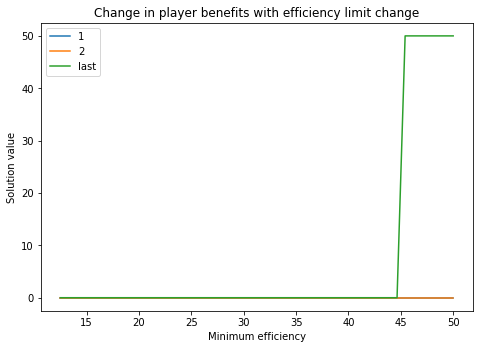

In [392]:
tauTotVals = {kk:[] for kk in players}
for kk in players:
    tauTotVals[kk] = [vv*tau[kk] for vv in xTotVals[kk]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(effs, tauTotVals['p0'])
l2 = ax.plot(effs, tauTotVals['p1'])
l3 = ax.plot(effs, tauTotVals[players[-1]])
ax.legend(labels=("1","2","last"))
ax.set_title("Change in player benefits with efficiency limit change")
ax.set_xlabel("Minimum efficiency")
ax.set_ylabel("Solution value")

Text(0, 0.5, 'Solution value')

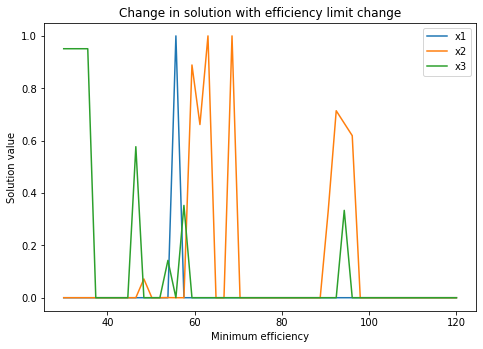

In [349]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(effs, xVals['p0','t0'])
l2 = ax.plot(effs, xVals['p1','t0'])
l3 = ax.plot(effs, xVals['p2','t0'])
ax.legend(labels=("x1","x2","x3"))
ax.set_title("Change in solution with efficiency limit change")
ax.set_xlabel("Minimum efficiency")
ax.set_ylabel("Solution value")

# Sand

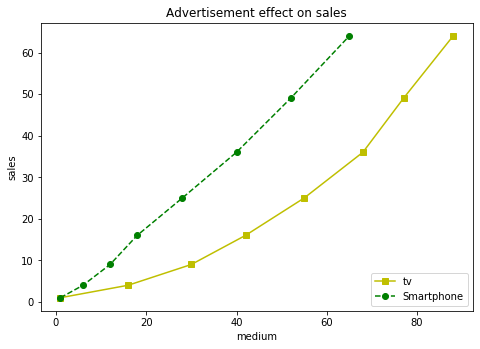

In [100]:
y = [1, 4, 9, 16, 25,36,49, 64]
x1 = [1, 16, 30, 42,55, 68, 77,88]
x2 = [1,6,12,18,28, 40, 52, 65]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(x1,y,'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(x2,y,'go--') # dash line with green colour and circle marker
ax.legend(labels = ('tv', 'Smartphone'), loc = 'lower right') # legend placed at lower right
ax.set_title("Advertisement effect on sales")
ax.set_xlabel('medium')
ax.set_ylabel('sales')
plt.show()

In [1]:
from gurobipy import *

In [6]:
ks = Model("Knapsack")
items = [1,2,3]
vals = {1:213, 2:-1928, 3:-11111, 4: -2345, 5: 9123}
weights = {1:12223, 2: 12222, 3: 36674, 4:61119, 5: 85569}
bagSize = 89643482

x = ks.addVars(items, obj = vals,vtype = GRB.INTEGER )
ks.addConstr(quicksum(x[i]*weights[i] for i in items) == bagSize)

<gurobi.Constr *Awaiting Model Update*>

In [7]:
ks.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (linux64)
Optimize a model with 1 rows, 3 columns and 3 nonzeros
Model fingerprint: 0xec3e2aad
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+04, 4e+04]
  Objective range  [2e+02, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+07, 9e+07]
Presolve time: 0.00s
Presolved: 1 rows, 3 columns, 3 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)

Root relaxation: objective -2.715721e+07, 1 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -2.716e+07    0    1          - -2.716e+07      -     -    0s
H    0     0                    1562142.0000 -2.716e+07  1838%     -    0s
     0     0 -2.716e+07    0    1 1562142.00 -2.716e+07  1838%     -    0s
     0     2 -2.715e+07    0    1 1562142.00 -2.715e+07  1838%     -    0s
H24510   218

In [8]:
x

{1: <gurobi.Var C0 (value 6.0)>,
 2: <gurobi.Var C1 (value 4580.0)>,
 3: <gurobi.Var C2 (value 916.0)>}